In [12]:
pip install pandas scipy numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 25.1.1
[notice] To update, run: C:\Users\jpedr\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Website Phishing é um banco de dados que tem como objetivo detectar sites de phishing na web, problema real a respeito da segurança da informação.

In [13]:
import pandas as pd
from scipy.io import arff

# Caminho para o arquivo ARFF
file_path = "./PhishingData.arff"

# Carregar os dados do arquivo ARFF
data, meta = arff.loadarff(file_path)

# Converter para um DataFrame do pandas
df = pd.DataFrame(data)

Ao baixar o dataset, nos foi retornado um arquivo .arff, utilizamos scipy para a leitura dele e posteriormente o trasnformamos em um DataFrame.

A seguir iremos entender um pouco mais sobre a sua estrutura e como os dados são apresentados.

In [14]:
#Exibir o número de linhas e colunas
print(f"WebPhishing possui {df.shape[0]} linhas e {df.shape[1]} colunas.")

# Exibir os nomes das colunas
print("Nomes das colunas:")
print(df.columns.tolist())

WebPhishing possui 1353 linhas e 10 colunas.
Nomes das colunas:
['SFH', 'popUpWidnow', 'SSLfinal_State', 'Request_URL', 'URL_of_Anchor', 'web_traffic', 'URL_Length', 'age_of_domain', 'having_IP_Address', 'Result']


In [15]:
#Exibir os tipos dos dados e número de valores nulos
print(f"Tipos dos dados:\n{df.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SFH                1353 non-null   object
 1   popUpWidnow        1353 non-null   object
 2   SSLfinal_State     1353 non-null   object
 3   Request_URL        1353 non-null   object
 4   URL_of_Anchor      1353 non-null   object
 5   web_traffic        1353 non-null   object
 6   URL_Length         1353 non-null   object
 7   age_of_domain      1353 non-null   object
 8   having_IP_Address  1353 non-null   object
 9   Result             1353 non-null   object
dtypes: object(10)
memory usage: 105.8+ KB
Tipos dos dados:
None


Nota-se a não presença de valores ausentes, o que nos dá um trabalho a menos.

In [16]:
#Exibir as primeiras 5 linhas do DataFrame
print(f"Primeiras 5 linhas:\n{df.head()}")

Primeiras 5 linhas:
     SFH popUpWidnow SSLfinal_State Request_URL URL_of_Anchor web_traffic  \
0   b'1'       b'-1'           b'1'       b'-1'         b'-1'        b'1'   
1  b'-1'       b'-1'          b'-1'       b'-1'         b'-1'        b'0'   
2   b'1'       b'-1'           b'0'        b'0'         b'-1'        b'0'   
3   b'1'        b'0'           b'1'       b'-1'         b'-1'        b'0'   
4  b'-1'       b'-1'           b'1'       b'-1'          b'0'        b'0'   

  URL_Length age_of_domain having_IP_Address Result  
0       b'1'          b'1'              b'0'   b'0'  
1       b'1'          b'1'              b'1'   b'1'  
2      b'-1'          b'1'              b'0'   b'1'  
3       b'1'          b'1'              b'0'   b'0'  
4      b'-1'          b'1'              b'0'   b'1'  


WebPhishing é agrupado em 9 features com seus dados representados de maneira categórica em 3 diferentes tipos: '-1' (negativo), '0'(neutro), '1'(positivo), o resultado é expresso em uma feature 'Result', tambem categórico: '-1' (Phishing), '0' (Neutro), '1' (Legítimo).

In [17]:
#Exibir as variáveis únicas
print(f"Variáveis únicas:\n{df.nunique()}")

Variáveis únicas:
SFH                  3
popUpWidnow          3
SSLfinal_State       3
Request_URL          3
URL_of_Anchor        3
web_traffic          3
URL_Length           3
age_of_domain        2
having_IP_Address    2
Result               3
dtype: int64


Aqui podemos ver a variação dos dados apresentada em cada coluna, com ressalvas para age_of_domain e having_IP_Address que apresentaram apenas dois tipos de variação.

In [22]:
#Verificando a existência de valores ruídos
for col in df.columns:
    print(f"{col}: {sorted(df[col].unique())}")

SFH: [b'-1', b'0', b'1']
popUpWidnow: [b'-1', b'0', b'1']
SSLfinal_State: [b'-1', b'0', b'1']
Request_URL: [b'-1', b'0', b'1']
URL_of_Anchor: [b'-1', b'0', b'1']
web_traffic: [b'-1', b'0', b'1']
URL_Length: [b'-1', b'0', b'1']
age_of_domain: [b'-1', b'1']
having_IP_Address: [b'0', b'1']
Result: [b'-1', b'0', b'1']


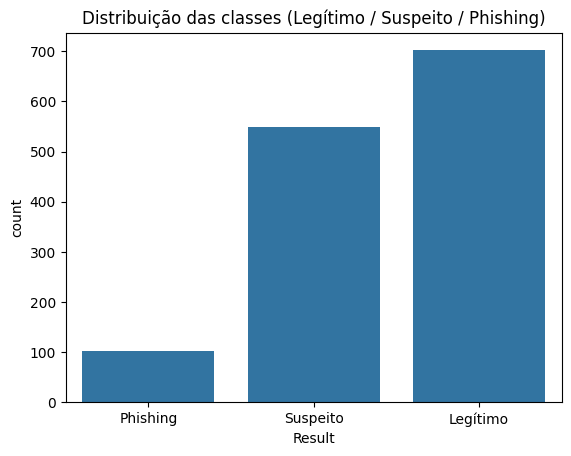

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Result', data=df)
plt.title('Distribuição das classes (Legítimo / Suspeito / Phishing)')
plt.xticks(ticks=[0, 1, 2], labels=['Phishing', 'Suspeito', 'Legítimo'])
plt.show()


Podemos ver que a maioria dos sites são legítimos, seguidos por sites suspeitos e, por último, os sites de phishing. Isso pode indicar que o conjunto de dados é desbalanceado, o que pode afetar o desempenho dos modelos de aprendizado de máquina. Portanto, será importante considerar técnicas de balanceamento de classes ao treinar modelos com esses dados.

Como queremos prever se um site é phishing ou não, podemos estabelecer que nosso atributo alvo é 'Result'.

Vamos ver portanto, atributos que estão mais correlacionados com nosso atributo alvo.

In [24]:
# Converter tudo de bytes para string
df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Converter para int (se apropriado)
df = df.astype(int)


C:\Users\jpedr\AppData\Local\Temp\ipykernel_21568\925951603.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)


In [25]:
correlation = df.corr(numeric_only=True)['Result'].sort_values(key=abs, ascending=False)
print(correlation)

Result               1.000000
SFH                 -0.678277
SSLfinal_State      -0.518762
popUpWidnow         -0.509749
URL_of_Anchor       -0.287007
Request_URL         -0.271609
web_traffic          0.243896
age_of_domain       -0.231931
URL_Length          -0.183061
having_IP_Address   -0.059225
Name: Result, dtype: float64


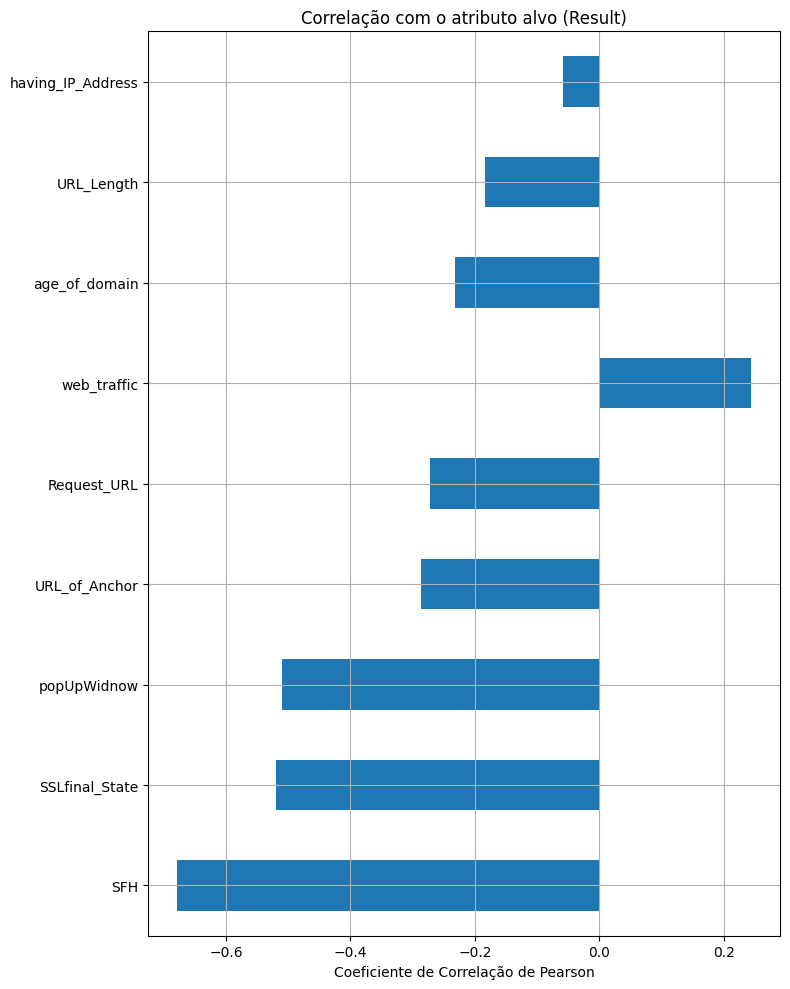

In [27]:
correlation.drop('Result').plot(kind='barh', figsize=(8, 10))
plt.title('Correlação com o atributo alvo (Result)')
plt.xlabel('Coeficiente de Correlação de Pearson')
plt.grid(True)
plt.tight_layout()
plt.show()